source : 
https://scikit-learn.org/stable/modules/linear_model.html


https://scikit-learn.org/stable/_sources/modules/linear_model.rst.txt

# 1.1 Linear Model

The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the features. <br>
In mathematical notation, if $\hat{y}$ is the predicted value:

$$ \hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p $$

Across the module, we designate the vector $w = (w_1,..., w_p)$ as `coef_` and $w_0$ as `intercept_`.


next


# 1.1.1 Ordinary Least Square

<b>`LinearRegression`</b> fits a linear model with coefficients $w = (w_1, ..., w_p)$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. 
Mathematically it solves a problem of the form:

$$ \min_{w} || X w - y||_2^2 $$


<b> LinearRegression </b> takes in its ``fit`` method arguments X, y, sample_weight and stores the coefficients 
 of the linear model in its `coef_` and `intercept_` attributes:

In [1]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
reg.coef_
reg.intercept_

np.float64(1.1102230246251565e-16)

## Data Loading and Preparation
Load the diabetes dataset. For simplicity, we only keep a single feature in the data. Then, we split the data and target into training and test sets.

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X = X[:, [2]]  # Use only one feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

## Linear regression model
We create a linear regression model and fit it on the training data. Note that by default, an intercept is added to the model. 
We can control this behavior by setting the fit_intercept parameter.

In [3]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, y_train)

## Model evaluation
We evaluate the model’s performance on the test set using the mean squared error and the coefficient of determination.

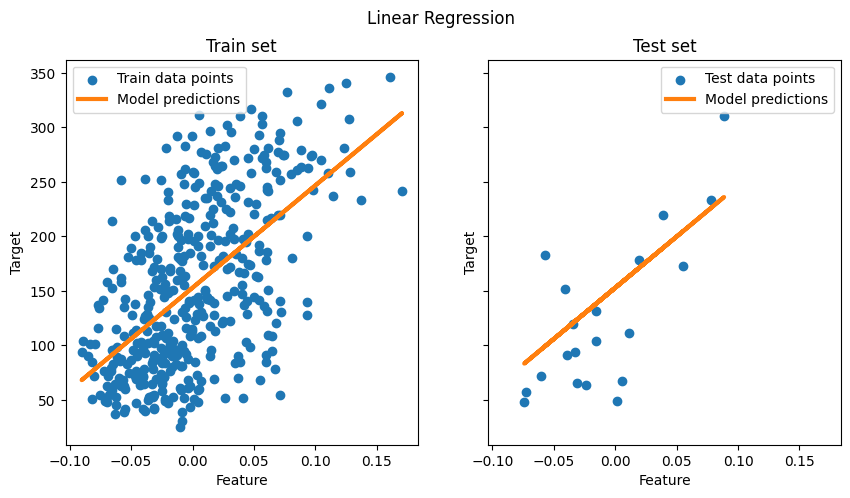

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, regressor.predict(X_test), linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 2548.07
Coefficient of determination: 0.47


The coefficient of determination, commonly known as R² (pronounced “R squared”) : 


$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
$$

where 

\begin{align*}
SS_{\text{res}} &= \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \\
SS_{\text{tot}} &= \sum_{i=1}^{n} (y_i - \bar{y})^2
\end{align*}


$\bar{y}$ is the mean of y

In [7]:
def manual_r2_score(y_true, y_pred):
    # Convert inputs to lists just in case they're not
    y_true = list(y_true)
    y_pred = list(y_pred)

    # Mean of actual values
    y_mean = sum(y_true) / len(y_true)
    
    # Total Sum of Squares (SS_tot)
    ss_tot = sum((y - y_mean) ** 2 for y in y_true)
    
    # Residual Sum of Squares (SS_res)
    ss_res = sum((y - y_hat) ** 2 for y, y_hat in zip(y_true, y_pred))
    
    # R² Score
    r2 = 1 - (ss_res / ss_tot)
    return r2

y_test = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

r2 = manual_r2_score(y_test, y_pred)
print(f"Manual R² score: {r2:.4f}")


Manual R² score: 0.9486


# Ordinary Least Squares and Ridge Regression Variance
Next, we illustrate the problem of high variance more clearly by using a tiny synthetic dataset. 
We sample only two data points, then repeatedly add small Gaussian noise to them and refit both OLS and Ridge. 
We plot each new line to see how much OLS can jump around, whereas Ridge remains more stable thanks to its penalty term.



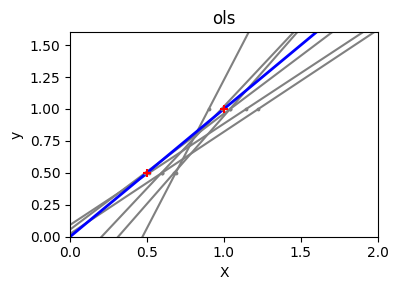

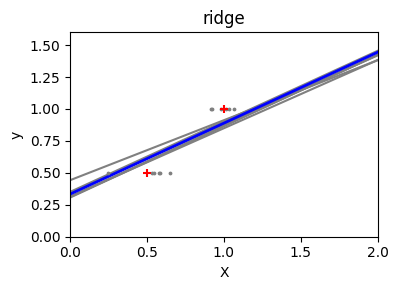

In [9]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

X_train = np.c_[0.5, 1].T
y_train = [0.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(
    ols=linear_model.LinearRegression(), ridge=linear_model.Ridge(alpha=0.1)
)

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(6):
        this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color="gray")
        ax.scatter(this_X, y_train, s=3, c="gray", marker="o", zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color="blue")
    ax.scatter(X_train, y_train, s=30, c="red", marker="+", zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel("X")
    ax.set_ylabel("y")

    fig.tight_layout()

plt.show()

### ❓ Ridge and Lasso in Linear Model?

**Ridge** and **Lasso** are two important types of **regularized linear regression models** in machine learning and statistics. 
They help prevent **overfitting** by **penalizing large coefficients** in the model.

---

## 🔢 Regularized Linear Models

Standard **Linear Regression** tries to minimize the **sum of squared errors**:

$$
\min_{w} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$


But this can lead to **overfitting**, especially when:
- You have many features
- Features are highly correlated
- The dataset is small

To fix that, we add **regularization**.

---

## 🧊 Ridge Regression (L2 Regularization)

### 🔹 Objective function:

$$
\[
\min_{w} \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^p w_j^2
\]
$$
- Adds a **penalty on the squared values of coefficients** (L2 norm)
- Helps **shrink** large coefficients, but **doesn't eliminate** them

✅ **Best used when**:
- Multicollinearity (correlated features) is present
- You want to retain all features but reduce their influence

---

## ✂️ Lasso Regression (L1 Regularization)

### 🔹 Objective function:
$$
\[
\min_{w} \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^p |w_j|
\]
$$
- Adds a **penalty on the absolute values of coefficients** (L1 norm)
- Can **shrink some coefficients to zero**, effectively doing **feature selection**

✅ **Best used when**:
- You believe many features are irrelevant
- You want a **sparse model** (only a few features retained)

---

## ⚖️ Key Differences Between Ridge and Lasso

| Feature           | Ridge Regression        | Lasso Regression         |
|-------------------|-------------------------|--------------------------|
| Penalty Type      | L2 (squared weights)    | L1 (absolute weights)    |
| Shrinks to Zero?  | ❌ No                   | ✅ Yes                   |
| Feature Selection | ❌ No                   | ✅ Yes                   |
| Ideal Scenario    | Many correlated features| Sparse feature sets      |

---

## 🧪 Example in Scikit-Learn

```python
from sklearn.linear_model import Ridge, Lasso

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)


R² scores:
Linear Regression: 0.9768
Ridge Regression:  0.8478
Lasso Regression:  0.9842


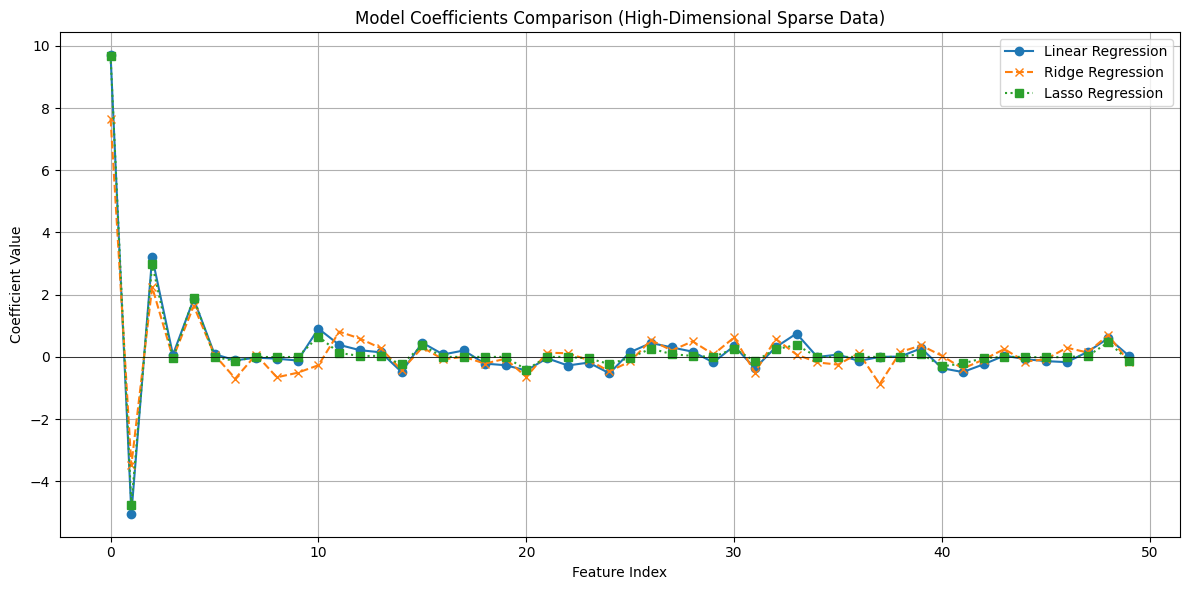

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Simulate high-dimensional dataset with irrelevant features
np.random.seed(42)
n_samples = 100
n_features = 50  # Many features, some irrelevant

# Create true coefficients (only a few are non-zero)
true_coef = np.zeros(n_features)
true_coef[:5] = [10, -5, 3, 0, 2]  # First few are important, others are noise

# Generate input data
X = np.random.randn(n_samples, n_features)

# Generate target with noise
y = X @ true_coef + np.random.randn(n_samples) * 2

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lin_reg = LinearRegression()
ridge = Ridge(alpha=10.0)
lasso = Lasso(alpha=0.1)

# Fit models
lin_reg.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Predict
y_pred_lin = lin_reg.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# R² scores
print("R² scores:")
print(f"Linear Regression: {r2_score(y_test, y_pred_lin):.4f}")
print(f"Ridge Regression:  {r2_score(y_test, y_pred_ridge):.4f}")
print(f"Lasso Regression:  {r2_score(y_test, y_pred_lasso):.4f}")

# Plot coefficients
plt.figure(figsize=(12, 6))
plt.plot(lin_reg.coef_, 'o-', label='Linear Regression')
plt.plot(ridge.coef_, 'x--', label='Ridge Regression')
plt.plot(lasso.coef_, 's:', label='Lasso Regression')
plt.axhline(0, color='black', linewidth=0.5)
plt.title("Model Coefficients Comparison (High-Dimensional Sparse Data)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
import pandas as pd
import numpy as np

# Assuming you have already defined these from earlier:
# - n_features
# - true_coef
# - lin_reg.coef_
# - ridge.coef_
# - lasso.coef_

# Combine into a DataFrame for easy comparison
coef_data = {
    "Feature Index": np.arange(n_features),
    "True Coef": true_coef,
    "Linear": lin_reg.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_
}

coef_df = pd.DataFrame(coef_data)

# Show first 10 features for inspection
print(coef_df.head(30))


    Feature Index  True Coef    Linear     Ridge     Lasso
0               0       10.0  9.696875  7.656614  9.667211
1               1       -5.0 -5.044064 -3.480302 -4.759268
2               2        3.0  3.206163  2.245036  2.983806
3               3        0.0  0.069349 -0.036841 -0.044463
4               4        2.0  1.858769  1.636325  1.898536
5               5        0.0  0.088522  0.061662  0.000000
6               6        0.0 -0.111032 -0.695913 -0.132552
7               7        0.0 -0.023616  0.073733  0.000000
8               8        0.0 -0.057806 -0.656259 -0.006610
9               9        0.0 -0.116645 -0.509018 -0.000000
10             10        0.0  0.907643 -0.267875  0.655575
11             11        0.0  0.386450  0.812253  0.125850
12             12        0.0  0.215577  0.587967  0.030581
13             13        0.0  0.146324  0.278212  0.031814
14             14        0.0 -0.484527 -0.427926 -0.234473
15             15        0.0  0.455172  0.303759  0.3672

## Example of manual calculation for Standard Linear Regression, Lasso and Ridge

In [35]:
import numpy as np

# Example dataset: 4 samples, 3 features
X = np.array([
    [1.0, 2.0, 3.0],
    [2.0, 3.0, 4.0],
    [3.0, 4.0, 5.0],
    [4.0, 5.0, 6.0]
])

# Actual target values (ground truth)
y = np.array([10.0, 12.0, 14.0, 16.0])

# Hypothetical Lasso model results
intercept = 1.0
coefficients = np.array([2.0, 0.0, 1.0])  # Note: Lasso set 2nd weight to 0 (sparse)
alpha = 0.1  # Regularization strength

# Step 1: Compute predictions
y_pred = intercept + X @ coefficients

# Step 2: Compute MSE (sum of squared errors)
mse_loss = np.sum((y - y_pred)**2)

# Step 3: Compute L1 penalty
l1_penalty = alpha * np.sum(np.abs(coefficients))

# Step 4: Total Lasso loss
lasso_loss = mse_loss + l1_penalty

# L2 Penalty (Ridge)
l2_penalty = alpha * np.sum(coefficients ** 2)     # 0.1 * (2.0² + 0.0² + 1.0²) = 0.1 * 5 = 0.5
ridge_loss = mse_loss + l2_penalty


print("L1 Penalty (Lasso):", l1_penalty)
print("L2 Penalty (Ridge):", l2_penalty)

# Show the results
print("Predictions:", y_pred)
print("MSE Loss:", mse_loss) 
print("\n")
print("L1 Penalty:", l1_penalty)
print("Total Lasso Loss:", lasso_loss)
print("\n")
print("L2 Penalty:", l2_penalty)
print("Total Lasso Loss:", ridge_loss)

print("Coefficient: ", coefficients)

L1 Penalty (Lasso): 0.30000000000000004
L2 Penalty (Ridge): 0.5
Predictions: [ 6.  9. 12. 15.]
MSE Loss: 30.0


L1 Penalty: 0.30000000000000004
Total Lasso Loss: 30.3


L2 Penalty: 0.5
Total Lasso Loss: 30.5
Coefficient:  [2. 0. 1.]


## Example of solver : svd and cholesky

In [34]:
import numpy as np

# Sample data
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
alpha = 1.0

# 1. Ridge solution using standard inverse (similar to 'svd' solver)
XTX = X.T @ X
ridge_matrix = XTX + alpha * np.eye(X.shape[1])
XTy = X.T @ y
w_svd = np.linalg.inv(ridge_matrix) @ XTy

# 2. Ridge solution using Cholesky decomposition
L = np.linalg.cholesky(ridge_matrix)
z = np.linalg.solve(L, XTy)        # Solve Lz = XTy
w_cholesky = np.linalg.solve(L.T, z)  # Solve Lᵀw = z


# Standard Linear Regression formula:
# w = (X^T X)^(-1) X^T y
XTX = X.T @ X
XTy = X.T @ y
w_ols = np.linalg.inv(XTX) @ XTy

print("OLS Weights (Standard Linear Regression):", w_ols)

# Print both weights
print("Weights using SVD-like solution:", w_svd)
print("Weights using Cholesky decomposition:", w_cholesky)
print("Difference:", w_svd - w_cholesky)


OLS Weights (Standard Linear Regression): [3.55271368e-15 5.00000000e-01]
Weights using SVD-like solution: [0.2        0.34285714]
Weights using Cholesky decomposition: [0.2        0.34285714]
Difference: [-2.77555756e-16  1.11022302e-16]


# 1.1.3.1. Setting regularization parameter
The alpha parameter controls the degree of sparsity of the estimated coefficients.

### 1.1.3.1.1. Using cross-validation
        LassoCV and LassoLarsCV
### 1.1.3.1.2. Information-criteria based model selection
        the estimator LassoLarsIC
### 1.1.3.1.3. AIC and BIC criteria
### 1.1.3.1.4. Comparison with the regularization parameter of SVM




# 1.1.11. Logistic regression